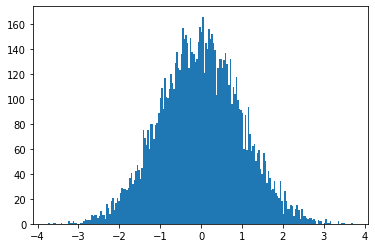

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import sklearn as sk
import random , calendar , datetime
from sklearn.model_selection import train_test_split
import tempfile


rand1 = random.Random()
rand1.seed()
rand2 = random.Random()
rand2.seed()
rand3 = random.Random()
rand3.seed()
rand4 = random.Random()
rand4.seed()


lambd = 1.5

values = []
for i in range(0 , 10000):
    values.append(rand1.gauss(0 , 1))

plt.hist(values,bins=200)
plt.show()


In [2]:
def convertToDateTime(seconds:int): 
    seconds = seconds % (24 * 3600) 
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
    return datetime.time(hour=hour , second=seconds , minute=minutes)

In [3]:
def convertToSeconds(time: datetime.time):
    hours = time.hour * 60 * 60
    minutes = time.minute * 60
    seconds = time.second
    return (hours+ minutes + seconds)


In [4]:
def get_random_dataset(amt:int):
    times = []
    clicked = []
    weekend = [0 , 6]
    days = []
    min_time = convertToSeconds(datetime.time(0))
    max_time = convertToSeconds(datetime.time(23))
    school_start = datetime.time(8)
    school_end = datetime.time(15)
    amt_record = 0
    while(amt_record < amt):
        day = random.randint(0 ,6)
        days.append(day)
        if(day in weekend):
            random_time = random.randint(min_time , max_time)
            times.append(convertToDateTime(random_time))
            if((random_time > convertToSeconds(datetime.time(9))) and (random_time < convertToSeconds(datetime.time(11)))):
                #user_click = int(random.expovariate(lambd))
                user_click = rand1.gauss(0 , 1)
                if(user_click >= -1 and user_click <= 1.5):
                    clicked.append(True)
                else:
                    clicked.append(False)
            else:
                #user_click = int(random.expovariate(lambd))
                user_click = rand2.gauss(0 , 1)
                if(user_click >= -1 and user_click <= 1.5):
                    clicked.append(False)
                else:
                    clicked.append(True)
        else:
            random_time = random.randint(min_time , max_time)
            times.append(convertToDateTime(random_time))
            if((random_time > convertToSeconds(datetime.time(8))) and (random_time < convertToSeconds(datetime.time(11)))):
                #user_click = int(random.expovariate(lambd))
                user_click = rand3.gauss(0 , 1)
                if(user_click >= -1 and user_click <= 1.5):
                    clicked.append(True)
                else:
                    clicked.append(False)   
            else:
                #user_click = int(random.expovariate(lambd))
                user_click = rand4.gauss(0 , 1)
                if(user_click >= -1 and user_click <= 1.5):
                    clicked.append(False)
                else:
                    clicked.append(True)   
        amt_record += 1

    return (days , times , clicked)    
        

In [5]:
dataset = get_random_dataset(10000)
dataset_dict = {'Days': dataset[0] , 'Time' : dataset[1] , 'Clicked': dataset[2]}
dataframe = pd.DataFrame(dataset_dict)
dataframe_train , dataframe_test = train_test_split(dataframe , test_size = 0.2)
dataframe = dataframe_train
dataframe.to_pickle("./data/dataset.pkl")
dataframe.head


<bound method NDFrame.head of       Days      Time  Clicked
6554     5  06:46:27     True
4855     1  07:31:24    False
9383     2  11:57:24    False
8990     6  02:37:01     True
8570     6  22:46:04    False
...    ...       ...      ...
6054     5  13:51:33    False
7938     6  19:26:06    False
6843     5  08:48:07     True
1374     6  06:22:56     True
4527     4  06:24:00    False

[8000 rows x 3 columns]>

In [6]:
dataframe['Clicked'] = pd.Categorical(dataframe['Clicked'])
dataframe['Clicked'] = dataframe.Clicked.cat.codes
dataframe.dtypes


Days        int64
Time       object
Clicked      int8
dtype: object

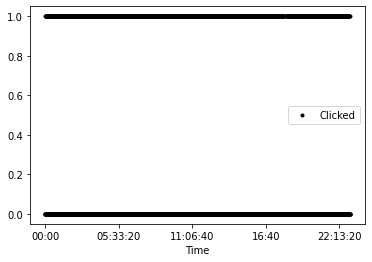

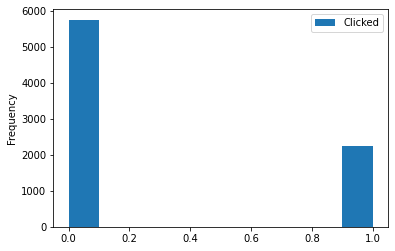

In [7]:
dataframe.plot(x="Time" , y="Clicked" , style="k.")
dataframe.plot(x='Days' , y='Clicked' , kind='hist')

In [8]:
dataframe.Time = dataframe.Time.apply(lambda x: convertToSeconds(x))
dataframe.dtypes


Days       int64
Time       int64
Clicked     int8
dtype: object

In [9]:
time_col = dataframe.Time
timeFrame = time_col.copy()
time_np= pd.DataFrame.to_numpy(timeFrame)
time_np[:10]

array([24387, 27084, 43044,  9421, 81964, 46095, 73661, 12421, 19614,
       40302])

In [10]:
buckets = [0 , 10800 , 21600, 32400, 43200 , 54000, 64800  ,75600 , 86400 ]
labels = ['first_eighth' , 'second_eighth' , 'third_eighth' , 'fourth_eighth' , 'fifth_eighth' , 'sixt_eighth' , 'seventh_eighth' , 'eighth_eighth']
labeled_time = pd.cut(time_np, right=True , bins=buckets , labels=labels)
labeled_time[:10]

[third_eighth, third_eighth, fourth_eighth, first_eighth, eighth_eighth, fifth_eighth, seventh_eighth, second_eighth, second_eighth, fourth_eighth]
Categories (8, object): [first_eighth < second_eighth < third_eighth < fourth_eighth < fifth_eighth < sixt_eighth < seventh_eighth < eighth_eighth]

In [11]:
timeFrame = dataframe.pop('Time')
dataframe['Time'] = labeled_time
dataframe.head

<bound method NDFrame.head of       Days  Clicked            Time
6554     5        1    third_eighth
4855     1        0    third_eighth
9383     2        0   fourth_eighth
8990     6        1    first_eighth
8570     6        0   eighth_eighth
...    ...      ...             ...
6054     5        0    fifth_eighth
7938     6        0  seventh_eighth
6843     5        1    third_eighth
1374     6        1    third_eighth
4527     4        0    third_eighth

[8000 rows x 3 columns]>

In [12]:
one_hot_times = pd.get_dummies(dataframe.Time , prefix='time')

In [13]:
for columns , series  in one_hot_times.items():
    dataframe[columns] = series
#adds to the column

In [14]:
#dataframe.head
dataframe.pop('Time')
dataframe.dtypes

Days                   int64
Clicked                 int8
time_first_eighth      uint8
time_second_eighth     uint8
time_third_eighth      uint8
time_fourth_eighth     uint8
time_fifth_eighth      uint8
time_sixt_eighth       uint8
time_seventh_eighth    uint8
time_eighth_eighth     uint8
dtype: object

In [15]:
one_hot_days = pd.get_dummies(dataframe.Days , prefix='day')

In [16]:
one_hot_days.head

<bound method NDFrame.head of       day_0  day_1  day_2  day_3  day_4  day_5  day_6
6554      0      0      0      0      0      1      0
4855      0      1      0      0      0      0      0
9383      0      0      1      0      0      0      0
8990      0      0      0      0      0      0      1
8570      0      0      0      0      0      0      1
...     ...    ...    ...    ...    ...    ...    ...
6054      0      0      0      0      0      1      0
7938      0      0      0      0      0      0      1
6843      0      0      0      0      0      1      0
1374      0      0      0      0      0      0      1
4527      0      0      0      0      1      0      0

[8000 rows x 7 columns]>

In [17]:
for columns , series in one_hot_days.items():
    dataframe[columns] = series

dataframe.pop('Days')
dataframe.head

<bound method NDFrame.head of       Clicked  time_first_eighth  time_second_eighth  time_third_eighth  \
6554        1                  0                   0                  1   
4855        0                  0                   0                  1   
9383        0                  0                   0                  0   
8990        1                  1                   0                  0   
8570        0                  0                   0                  0   
...       ...                ...                 ...                ...   
6054        0                  0                   0                  0   
7938        0                  0                   0                  0   
6843        1                  0                   0                  1   
1374        1                  0                   0                  1   
4527        0                  0                   0                  1   

      time_fourth_eighth  time_fifth_eighth  time_sixt_eighth  \
6554

In [18]:
target = dataframe.pop('Clicked')
dataset = tf.data.Dataset.from_tensor_slices((dataframe.values , target))


In [19]:
def get_compiled_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10 , activation='relu'),
        tf.keras.layers.Dense( 5, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
    return model
    

In [20]:
accuracy = []
loss = []
class CheckEpochAccuracy(keras.callbacks.Callback):
    def on_epoch_end(self , epoch , log=None):
        accuracy.append(log["accuracy"])
        loss.append(log["loss"])
        print("...Predicting: start of epoch{0}; got accuracy: {1}".format(epoch, log["accuracy"]))


In [21]:
train_dataset = dataset.shuffle(len(dataframe)).batch(1)
train_dataset.element_spec

(TensorSpec(shape=(None, 15), dtype=tf.uint8, name=None),
 TensorSpec(shape=(None,), dtype=tf.int8, name=None))

In [22]:
model = get_compiled_model()
model.fit(train_dataset , epochs=10 , callbacks=[CheckEpochAccuracy()])

Epoch 1/10
8000/8000 [==============================] - 5s 609us/step - loss: 0.5725 - accuracy: 0.7203
Epoch 2/10
8000/8000 [==============================] - 5s 651us/step - loss: 0.5614 - accuracy: 0.7207
Epoch 3/10
8000/8000 [==============================] - 5s 607us/step - loss: 0.5610 - accuracy: 0.7200
Epoch 4/10
8000/8000 [==============================] - 5s 673us/step - loss: 0.5604 - accuracy: 0.7206
Epoch 5/10
8000/8000 [==============================] - 5s 631us/step - loss: 0.5600 - accuracy: 0.7206
Epoch 6/10
8000/8000 [==============================] - 5s 598us/step - loss: 0.5600 - accuracy: 0.7230
Epoch 7/10
8000/8000 [==============================] - 5s 597us/step - loss: 0.5595 - accuracy: 0.7191
Epoch 8/10
8000/8000 [==============================] - 5s 660us/step - loss: 0.5598 - accuracy: 0.7211
Epoch 9/10
8000/8000 [==============================] - 5s 598us/step - loss: 0.5597 - accuracy: 0.7228
Epoch 10/10
8000/8000 [==============================] - 5s 594u

In [23]:
dataframe_test.head
def transform(dataframe):
    print(dataframe) 
    dataframe['Clicked'] = pd.Categorical(dataframe['Clicked'])
    dataframe['Clicked'] = dataframe.Clicked.cat.codes
    dataframe.Time = dataframe.Time.apply(lambda x: convertToSeconds(x))
    time_col = dataframe.Time
    timeFrame = time_col.copy()
    time_np= pd.DataFrame.to_numpy(timeFrame)
    buckets = [0 , 10800 , 21600, 32400, 43200 , 54000, 64800  ,75600 , 86400 ]
    labels = ['first_eighth' , 'second_eighth' , 'third_eighth' , 'fourth_eighth' , 'fifth_eighth' , 'sixt_eighth' , 'seventh_eighth' , 'eighth_eighth']
    labeled_time = pd.cut(time_np, right=True , bins=buckets , labels=labels)
    timeFrame = dataframe.pop('Time')
    dataframe['Time'] = labeled_time
    one_hot_times = pd.get_dummies(dataframe.Time , prefix='time')
    for columns , series  in one_hot_times.items():
        dataframe[columns] = series
    dataframe.pop('Time')
    one_hot_days = pd.get_dummies(dataframe.Days , prefix='day')
    for columns , series in one_hot_days.items():
        dataframe[columns] = series
    dataframe.pop('Days')
    target = dataframe.pop('Clicked')
    dataset = tf.data.Dataset.from_tensor_slices((dataframe.values , target))
    train_dataset = dataset.shuffle(len(dataframe)).batch(1)
    return train_dataset

In [24]:
train_data = transform(dataframe_test)
print("Evaluate on test data")
results = model.evaluate(train_data)
print("test loss, test acc:", results)

Days      Time  Clicked
8101     3  11:02:02     True
1282     3  16:53:00    False
8602     3  06:28:18    False
9317     6  04:10:25    False
4858     0  13:08:55    False
...    ...       ...      ...
9995     2  13:44:05    False
9698     0  10:55:46     True
7237     6  22:13:01    False
7262     1  18:42:17    False
4645     4  03:19:04    False

[2000 rows x 3 columns]
Evaluate on test data
2000/2000 [==============================] - 1s 453us/step - loss: 0.5627 - accuracy: 0.7205
test loss, test acc: [0.5626879930496216, 0.7204999923706055]


In [26]:
model.save('./models/')

INFO:tensorflow:Assets written to: ./models/assets
